In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def calc_var(magnetization, bins):
    bin_order = {-1: np.abs(magnetization)}

    for b in range(bins):
        bin_order[b] = (bin_order[b-1][::2] + bin_order[b-1][1::2])/2
    
    variances = []
    
    for b in range(bins):
        cur_bin = bin_order[b]
        mean_bin = np.mean(cur_bin)
        squared_diff = (cur_bin - mean_bin)**2
        normalized_sum = np.sum(squared_diff)/(len(cur_bin)*(len(cur_bin)-1))
        variances.append(normalized_sum)

    return variances

In [3]:
os.chdir('..')

In [4]:
bins = 8

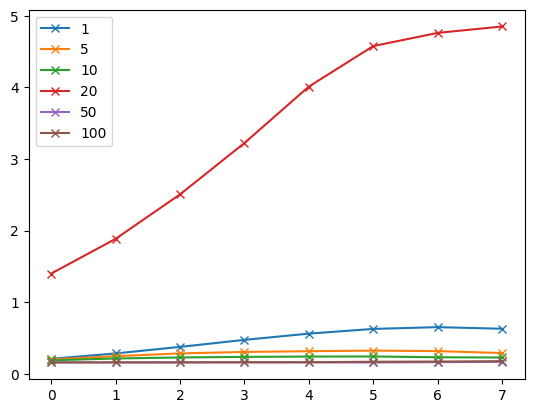

In [7]:
lo = [1,5,10,20,50,100]

variances = {}

for l in lo:
    magnetization = np.loadtxt(f"mag_nit32768_nw_30000_lo_{l}_t_1.700000_p0.060000.txt")
    variances[l] = calc_var(magnetization, bins)

for l in lo:
    plt.plot(np.arange(len(variances[l])),np.sqrt(variances[l]),marker = 'x', label = l)
plt.legend()

In [8]:
lo = [1,5,10,20,50,100]

variances_2 = {}

for l in lo:
    magnetization = np.loadtxt(f"mag_nit32768_nw_30000_lo_{l}_t_2.000000_p0.060000.txt")
    variances_2[l] = calc_var(magnetization, bins)

In [11]:
lo = [1,5,10,20,50,100]

variances_15 = {}

for l in lo:
    magnetization = np.loadtxt(f"mag_nit32768_nw_30000_lo_{l}_t_1.500000_p0.060000.txt")
    variances_15[l] = calc_var(magnetization, bins)

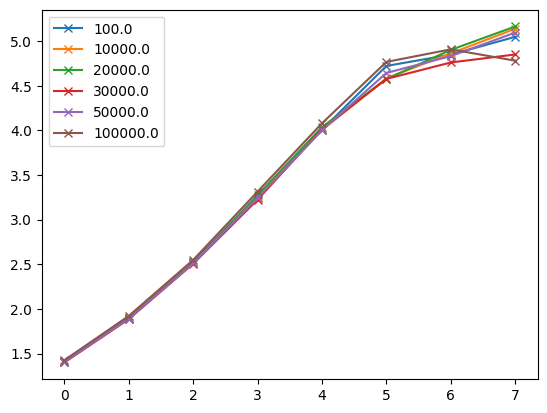

In [37]:
lo = [1e02,1e04,2e04,3e04,5e04,1e05]

variances_w = {}

bins = 8

for l in lo:
    magnetization = np.loadtxt(f"mag_nit32768_nw_{int(l)}_lo_20_t_1.700000_p0.060000.txt")
    variances_w[l] = calc_var(np.abs(magnetization), bins)

for l in lo:
    plt.plot(np.arange(len(variances_w[l])),np.sqrt(variances_w[l]),marker = 'x', label = l)
plt.legend()

/tmp/ipykernel_214034/1325139566.py:13: RuntimeWarning: invalid value encountered in double_scalars
  normalized_sum = np.sum(squared_diff)/(len(cur_bin)*(len(cur_bin)-1))


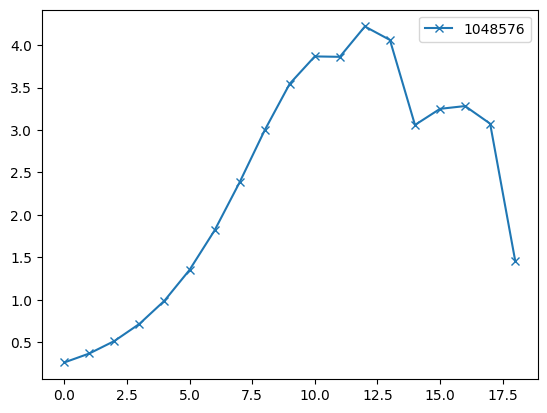

In [35]:
bins = 20

lo = [2**20]

variances_w = {}

for l in lo:
    magnetization = np.loadtxt(f"mag_nit{l}_nw_10000_lo_1_t_1.700000_p0.060000.txt")
    variances_w[l] = calc_var(np.abs(magnetization), bins)

for l in lo:
    plt.plot(np.arange(len(variances_w[l])),np.sqrt(variances_w[l]),marker = 'x', label = l)
plt.legend()

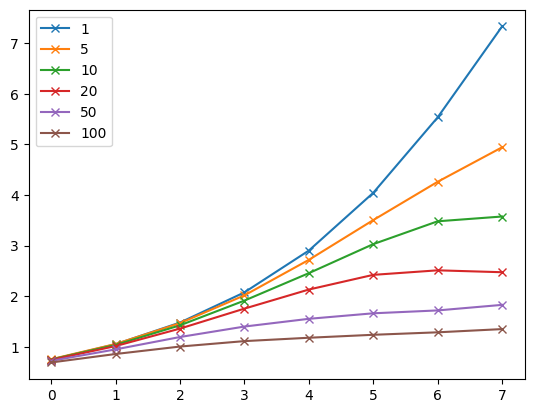

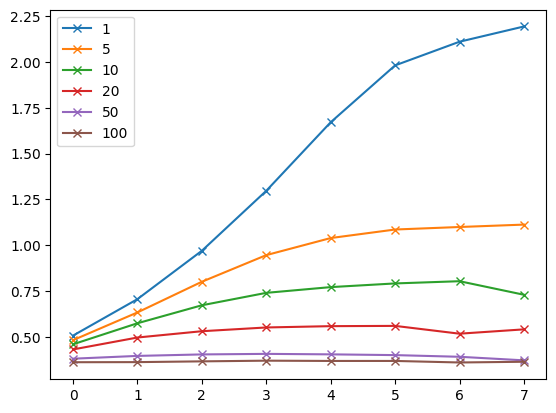

In [10]:
for l in lo:
    plt.plot(np.arange(len(variances_2[l])),np.sqrt(variances_2[l]),marker = 'x', label = l)
plt.legend()

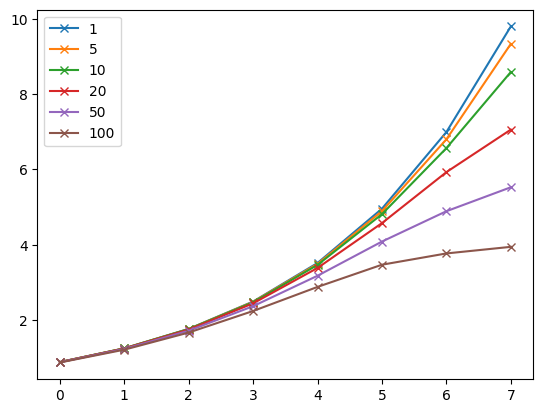

In [12]:
for l in lo:
    plt.plot(np.arange(len(variances_15[l])),np.sqrt(variances_15[l]),marker = 'x', label = l)
plt.legend()